# LeNet-5 Implementation (MNIST)

### Step 0: Imports and Setup

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

### Step 1: Load and Preprocess Data

In [10]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = np.expand_dims(x_train.astype('float32')/255.0,-1)
x_test = np.expand_dims(x_test.astype('float32')/255.0, -1)


### Step 2: Define the Model ( Functional API)

In [11]:
inputs = tf.keras.Input(shape=(28,28,1))

x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='mnist_cnn_functional')

In [17]:
def build_lenet5(input_shape=(28,28,1), num_classes=10):
    model = tf.keras.Sequential([
        # C1: Conv Layer
        tf.keras.layers.Conv2D(6, (5,5), activation='tanh', padding="same", input_shape=input_shape),
        # S2: Avg Pooling
        tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
        
        # C3: Conv Layer
        tf.keras.layers.Conv2D(16, (5,5), activation='tanh'),
        # S4: Avg Pooling
        tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
        
        # Flatten + Fully Connected layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='tanh'),   # F5
        tf.keras.layers.Dense(84, activation='tanh'),    # F6
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output
    ])
    return model
model_lenet = build_lenet5()

### Step 3: Compile Model

In [18]:
# model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lenet.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Step 4: Train the Modeo

In [19]:
history = model_lenet.fit(
    x_train, y_train, epochs=10,
    batch_size=128, validation_split=.1,
    verbose=2
)


Epoch 1/10
422/422 - 7s - 17ms/step - accuracy: 0.8964 - loss: 0.3528 - val_accuracy: 0.9650 - val_loss: 0.1309
Epoch 2/10
422/422 - 1s - 3ms/step - accuracy: 0.9606 - loss: 0.1295 - val_accuracy: 0.9767 - val_loss: 0.0878
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.9740 - loss: 0.0858 - val_accuracy: 0.9787 - val_loss: 0.0746
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.9797 - loss: 0.0649 - val_accuracy: 0.9783 - val_loss: 0.0688
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.9843 - loss: 0.0513 - val_accuracy: 0.9830 - val_loss: 0.0560
Epoch 6/10
422/422 - 1s - 3ms/step - accuracy: 0.9874 - loss: 0.0416 - val_accuracy: 0.9832 - val_loss: 0.0585
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9862 - val_loss: 0.0511
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.9915 - loss: 0.0276 - val_accuracy: 0.9847 - val_loss: 0.0541
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9928 - loss: 0.0234 - val_accuracy: 0.9853 - val_loss: 0.0586


In [20]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc}")

Test Accuracy: 0.9894000291824341


### Step 5: Visualizations and Explanations

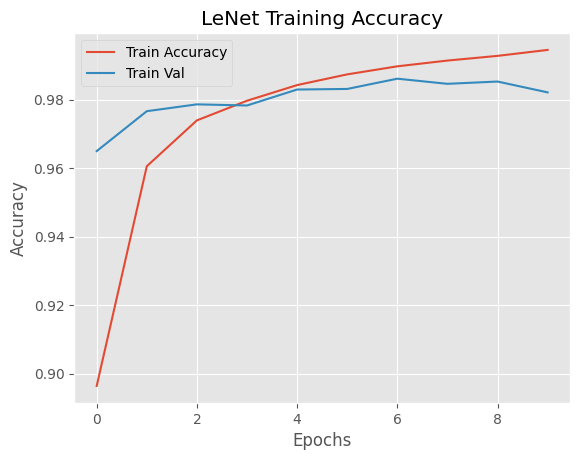

In [22]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Train Val')
plt.xlabel('Epochs');plt.ylabel('Accuracy');plt.title('LeNet Training Accuracy'); plt.legend();plt.show()

### Step 6: Notes and Key explanations